## Notebook for the Epithelial Reference Map preparation with Geosketch

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 29th May 2023

### Import required moduls

In [1]:
import scanpy as sc

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geosketch import gs

In [3]:
from matplotlib import axes
from matplotlib import pylab

#### Setup Cells

In [4]:
%matplotlib inline

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/Users/anna.maguza/miniconda3/envs/geosketch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


### Upload data

In [9]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Healthy_integrated_data_all_genes.h5ad'
Healthy_adata = sc.read_h5ad(input)

### Filter epithelial cells

In [12]:
# Filter out fetal and pediatric samples
Healthy_adata = Healthy_adata[Healthy_adata.obs['Diagnosis'] != 'Fetal Healthy', :]
Healthy_adata = Healthy_adata[Healthy_adata.obs['Diagnosis'] != 'Pediatric healthy', :]

In [10]:
# Subset only epitheleal cells
Healthy_adata = Healthy_adata[Healthy_adata.obs['Cell Type'] == 'Epithelial', :]

### Step 1 - create a proportion graph for cell types

In [11]:
df = Healthy_adata.obs['Cell States'].value_counts()

In [13]:
Healthy_adata.obs['Cell States GCA'].value_counts()

TA                       42915
Colonocyte               11819
Enterocyte                9420
BEST4+ epithelial         3774
BEST2+ Goblet cell        2924
Paneth                    2636
Stem_Cells_ext            2508
Stem_Cells_GCA             902
Goblet cell                641
Tuft                       563
Microfold cell             342
EC cells (TAC1+)            42
L cells (PYY+)              31
EECs                        14
I cells (CCK+)               6
N cells (NTS+)               5
D cells (SST+)               5
M/X cells (MLN/GHRL+)        4
Progenitor (NEUROG3+)        4
K cells (GIP+)               2
Name: Cell States GCA, dtype: int64

In [14]:
Healthy_adata.obs['Cell States Kong'].value_counts()

Enterocytes TMIGD1 MEP1A          26232
Enterocytes CA1 CA2 CA4-          14868
Stem cells OLFM4                   7053
Goblet cells MUC2 TFF1-            5967
Epithelial Cycling cells           5391
Stem cells OLFM4 LGR5              4972
Stem cells OLFM4 PCNA              2931
Goblet cells MUC2 TFF1             2881
Enterocytes BEST4                  1705
Stem cells OLFM4 GSTA1             1404
Paneth cells                        837
Epithelial HBB HBA                  670
Tuft cells                          641
Goblet cells SPINK4                 638
Epithelial cells METTL12 MAFB       471
Enterocytes TMIGD1 MEP1A GSTA1      432
Enteroendocrine cells               271
L cells                             197
Enterochromaffin cells               77
Name: Cell States Kong, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocytes TMIGD1 MEP1A'),
  Text(2, 0, 'Stem cells OLFM4'),
  Text(3, 0, 'Enterocytes CA1 CA2 CA4-'),
  Text(4, 0, 'Colonocyte'),
  Text(5, 0, 'Enterocyte'),
  Text(6, 0, 'Stem cells OLFM4 LGR5'),
  Text(7, 0, 'Goblet cells MUC2 TFF1-'),
  Text(8, 0, 'Epithelial Cycling cells'),
  Text(9, 0, 'BEST4+ epithelial'),
  Text(10, 0, 'BEST2+ Goblet cell'),
  Text(11, 0, 'Goblet cells MUC2 TFF1'),
  Text(12, 0, 'Paneth'),
  Text(13, 0, 'Enterocytes BEST4'),
  Text(14, 0, 'Paneth cells'),
  Text(15, 0, 'Stem_Cells_GCA'),
  Text(16, 0, 'Stem cells OLFM4 PCNA'),
  Text(17, 0, 'Epithelial HBB HBA'),
  Text(18, 0, 'Tuft cells'),
  Text(19, 0, 'Goblet cell'),
  Text(20, 0, 'Goblet cells SPINK4'),
  Text(21, 0, 'Tuft'),
  Text(22, 0, 'Epithelia

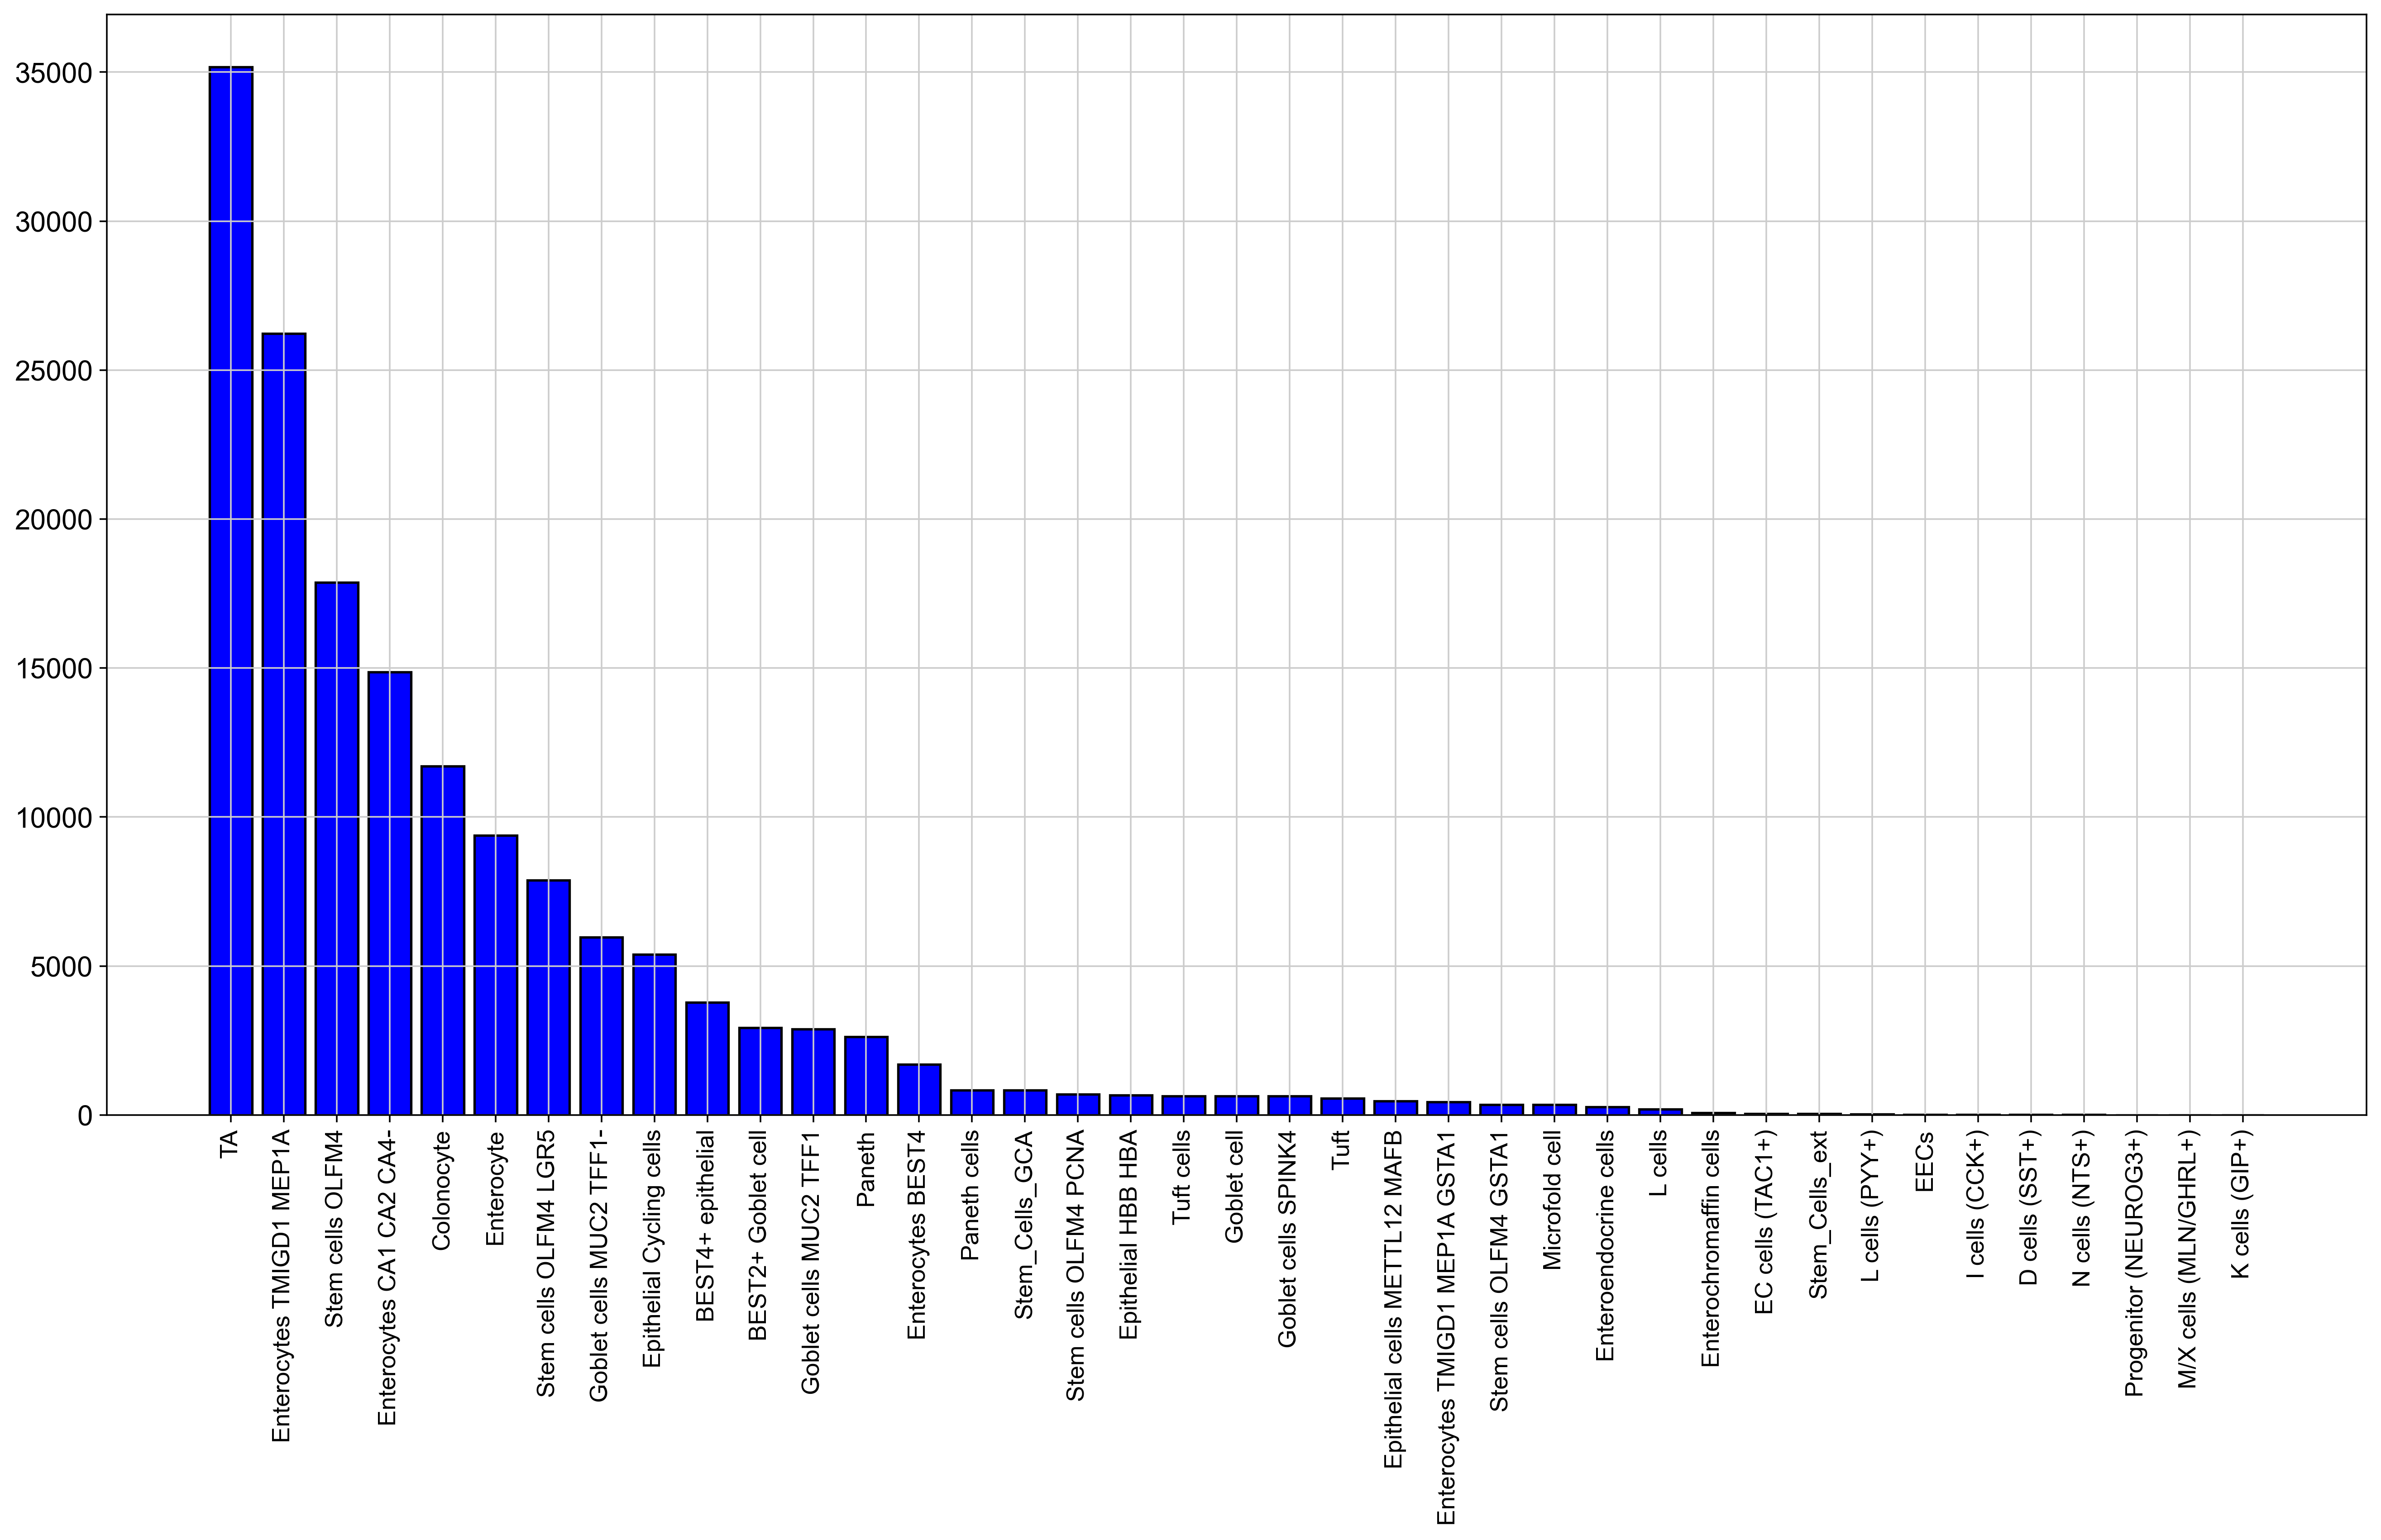

In [15]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Healthy_adata.obs["Cell States"].value_counts().index, Healthy_adata.obs["Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [16]:
Healthy_adata.obs['Unified Cell States'] = Healthy_adata.obs['Cell States']

/var/folders/gb/wwnzrh015q9dns5cmsc3xcjsxglkqz/T/ipykernel_36844/1371884156.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Healthy_adata.obs['Unified Cell States'] = Healthy_adata.obs['Cell States']


In [17]:
Healthy_adata.obs['Unified Cell States'].replace({"Enterocytes TMIGD1 MEP1A": 'Enterocyte',
                                               'Enterocytes CA1 CA2 CA4-': 'Enterocyte',
                                               'Enterocytes TMIGD1 MEP1A GSTA1': 'Enterocyte',
                                               'Enterocytes BEST4': 'BEST4+ epithelial',
                                               'Stem_Cells_GCA': 'Stem cells OLFM4',
                                               'Stem_Cells_ext': 'Stem cells OLFM4',
                                               'Tuft': 'Tuft cells',
                                               'Paneth': 'Paneth cells',
                                               'Epithelial Cycling cells': 'TA',
                                               'Goblet cells SPINK4': 'Goblet cells',
                                               'Goblet cell': 'Goblet cells',
                                               'Goblet cells MUC2 TFF1-': 'Goblet cells',
                                               'Goblet cells MUC2 TFF1': 'Goblet cells',
                                               'EC cells (TAC1+)': 'Enterochromaffin cells',
                                               'EECs': 'Enteroendocrine cells',
                                               'K cells (GIP+)': 'Enteroendocrine cells',
                                               'M/X cells (MLN/GHRL+)': 'Enteroendocrine cells',
                                               'Progenitor (NEUROG3+)': 'Enteroendocrine cells',
                                               'D cells (SST+)': 'Enteroendocrine cells',
                                               'I cells (CCK+)': 'Enteroendocrine cells',
                                               'N cells (NTS+)': 'Enteroendocrine cells',
                                               'L cells (PYY+)': 'L cells'}, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Enterocyte'),
  Text(1, 0, 'TA'),
  Text(2, 0, 'Stem cells OLFM4'),
  Text(3, 0, 'Colonocyte'),
  Text(4, 0, 'Goblet cells'),
  Text(5, 0, 'Stem cells OLFM4 LGR5'),
  Text(6, 0, 'BEST4+ epithelial'),
  Text(7, 0, 'Paneth cells'),
  Text(8, 0, 'BEST2+ Goblet cell'),
  Text(9, 0, 'Tuft cells'),
  Text(10, 0, 'Stem cells OLFM4 PCNA'),
  Text(11, 0, 'Epithelial HBB HBA'),
  Text(12, 0, 'Epithelial cells METTL12 MAFB'),
  Text(13, 0, 'Stem cells OLFM4 GSTA1'),
  Text(14, 0, 'Microfold cell'),
  Text(15, 0, 'Enteroendocrine cells'),
  Text(16, 0, 'L cells'),
  Text(17, 0, 'Enterochromaffin cells')])

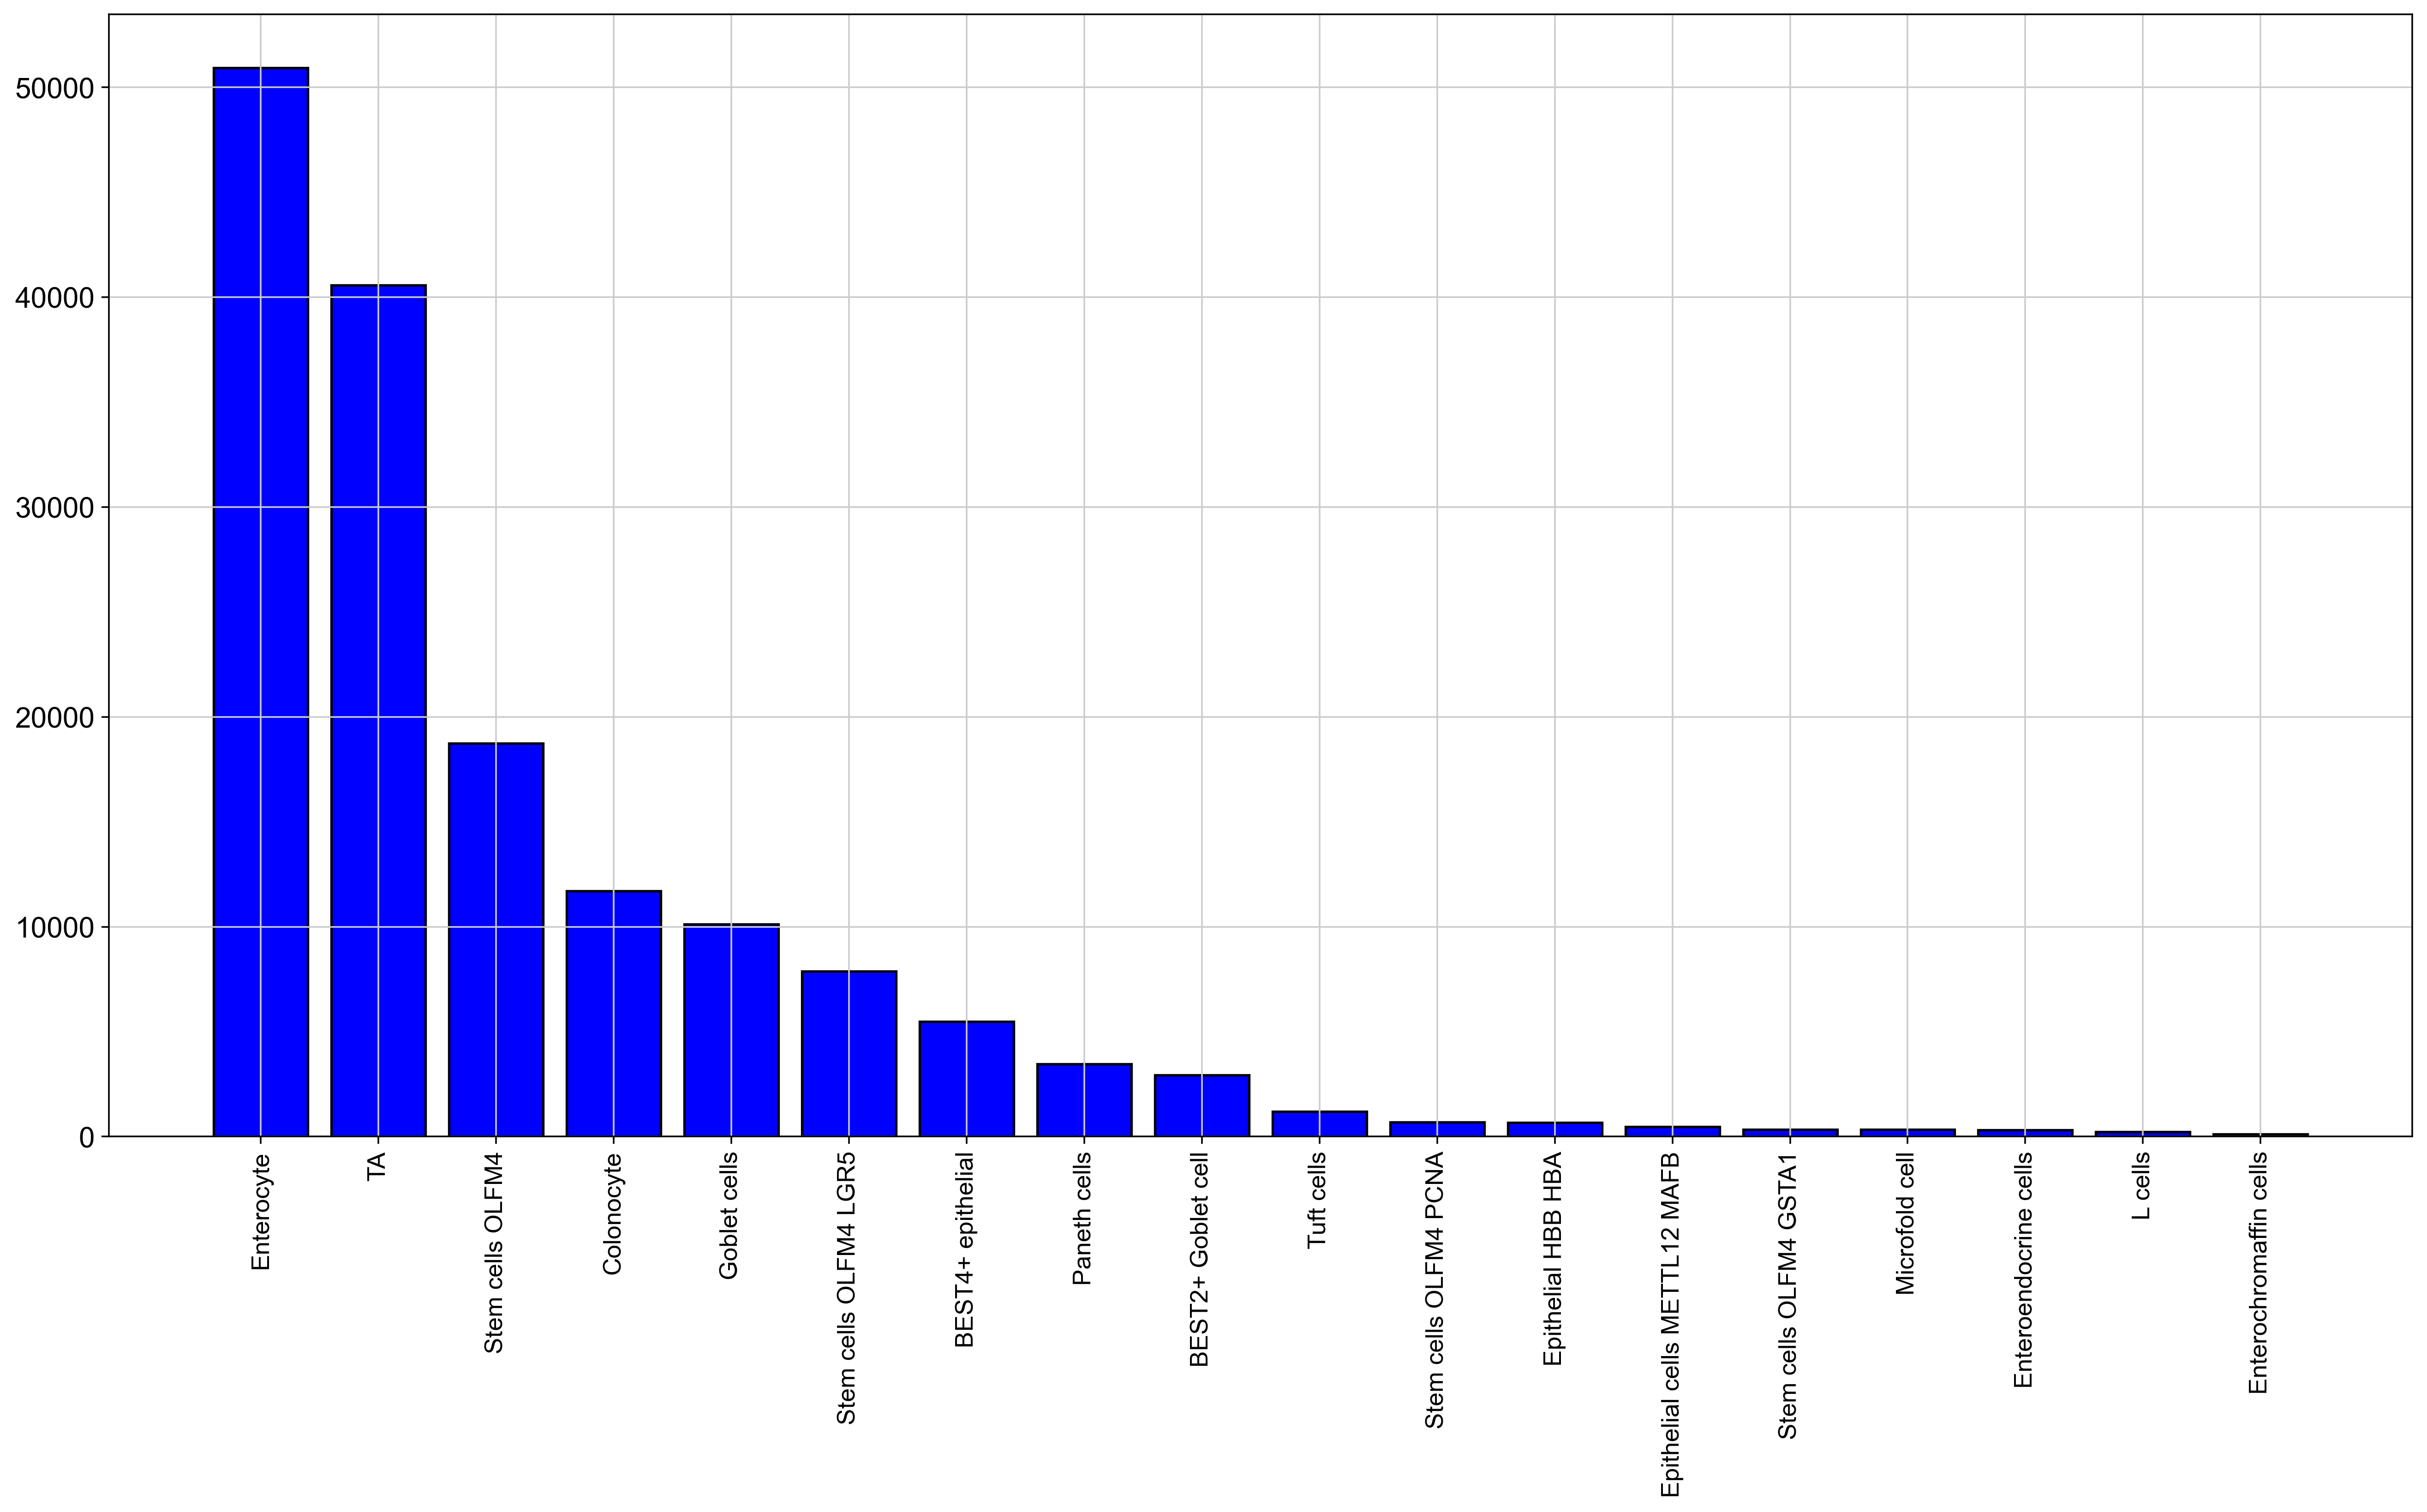

In [18]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Healthy_adata.obs["Unified Cell States"].value_counts().index, Healthy_adata.obs["Unified Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

### Subset data with `geosketch`

In [19]:
#Extract the most abumdant cell states
TA = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['TA']), :]
Enterocyte = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Enterocyte']), :]
Colonocyte = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Colonocyte']), :]
Stem = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Stem cells OLFM4']), :]
Goblet = Healthy_adata[Healthy_adata.obs["Unified Cell States"].isin(['Goblet cells']), :]

In [20]:
sc.pp.pca(TA)
sc.pp.pca(Enterocyte)
sc.pp.pca(Colonocyte)
sc.pp.pca(Stem)
sc.pp.pca(Goblet)

computing PCA
    with n_comps=50
    finished (0:00:12)
computing PCA
    with n_comps=50
    finished (0:00:15)
computing PCA
    with n_comps=50
    finished (0:00:05)
computing PCA
    with n_comps=50
    finished (0:00:10)
computing PCA
    with n_comps=50
    finished (0:00:05)


In [21]:
N = 10000
sketch_index_TA = gs(TA.obsm['X_pca'], N, replace = False)
sketch_index_Enterocyte = gs(Enterocyte.obsm['X_pca'], N, replace = False)
sketch_index_Colonocyte = gs(Colonocyte.obsm['X_pca'], N, replace = False)
sketch_index_Stem = gs(Stem.obsm['X_pca'], N, replace = False)
sketch_index_Goblet = gs(Goblet.obsm['X_pca'], N, replace = False)

In [22]:
#Subset cells according to the sketch index
subset_TA = TA[TA.obs_names[sketch_index_TA]]
subset_Enterocyte = Enterocyte[Enterocyte.obs_names[sketch_index_Enterocyte]]
subset_Colonocyte = Colonocyte[Colonocyte.obs_names[sketch_index_Colonocyte]]
subset_Stem = Stem[Stem.obs_names[sketch_index_Stem]]
subset_Goblet = Goblet[Goblet.obs_names[sketch_index_Goblet]]

In [25]:
# Drop TA, Enterocyte and Plasma cells from the anndata_adult object
Healthy_adata = Healthy_adata[~Healthy_adata.obs['Unified Cell States'].isin(['TA', 'Enterocyte', 'Colonocyte', 'Stem cells OLFM4', 'Goblet cells']), :]

In [27]:
# Concatenate the subset of TA, Enterocyte and Colonocyte cells with the epithelial_cells_subset
Healthy_adata = ad.concat([Healthy_adata, subset_TA, subset_Enterocyte, subset_Colonocyte, subset_Stem])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Stem cells OLFM4'),
  Text(1, 0, 'TA'),
  Text(2, 0, 'Colonocyte'),
  Text(3, 0, 'Enterocyte'),
  Text(4, 0, 'Stem cells OLFM4 LGR5'),
  Text(5, 0, 'BEST4+ epithelial'),
  Text(6, 0, 'Paneth cells'),
  Text(7, 0, 'BEST2+ Goblet cell'),
  Text(8, 0, 'Tuft cells'),
  Text(9, 0, 'Stem cells OLFM4 PCNA'),
  Text(10, 0, 'Epithelial HBB HBA'),
  Text(11, 0, 'Epithelial cells METTL12 MAFB'),
  Text(12, 0, 'Stem cells OLFM4 GSTA1'),
  Text(13, 0, 'Microfold cell'),
  Text(14, 0, 'Enteroendocrine cells'),
  Text(15, 0, 'L cells'),
  Text(16, 0, 'Enterochromaffin cells')])

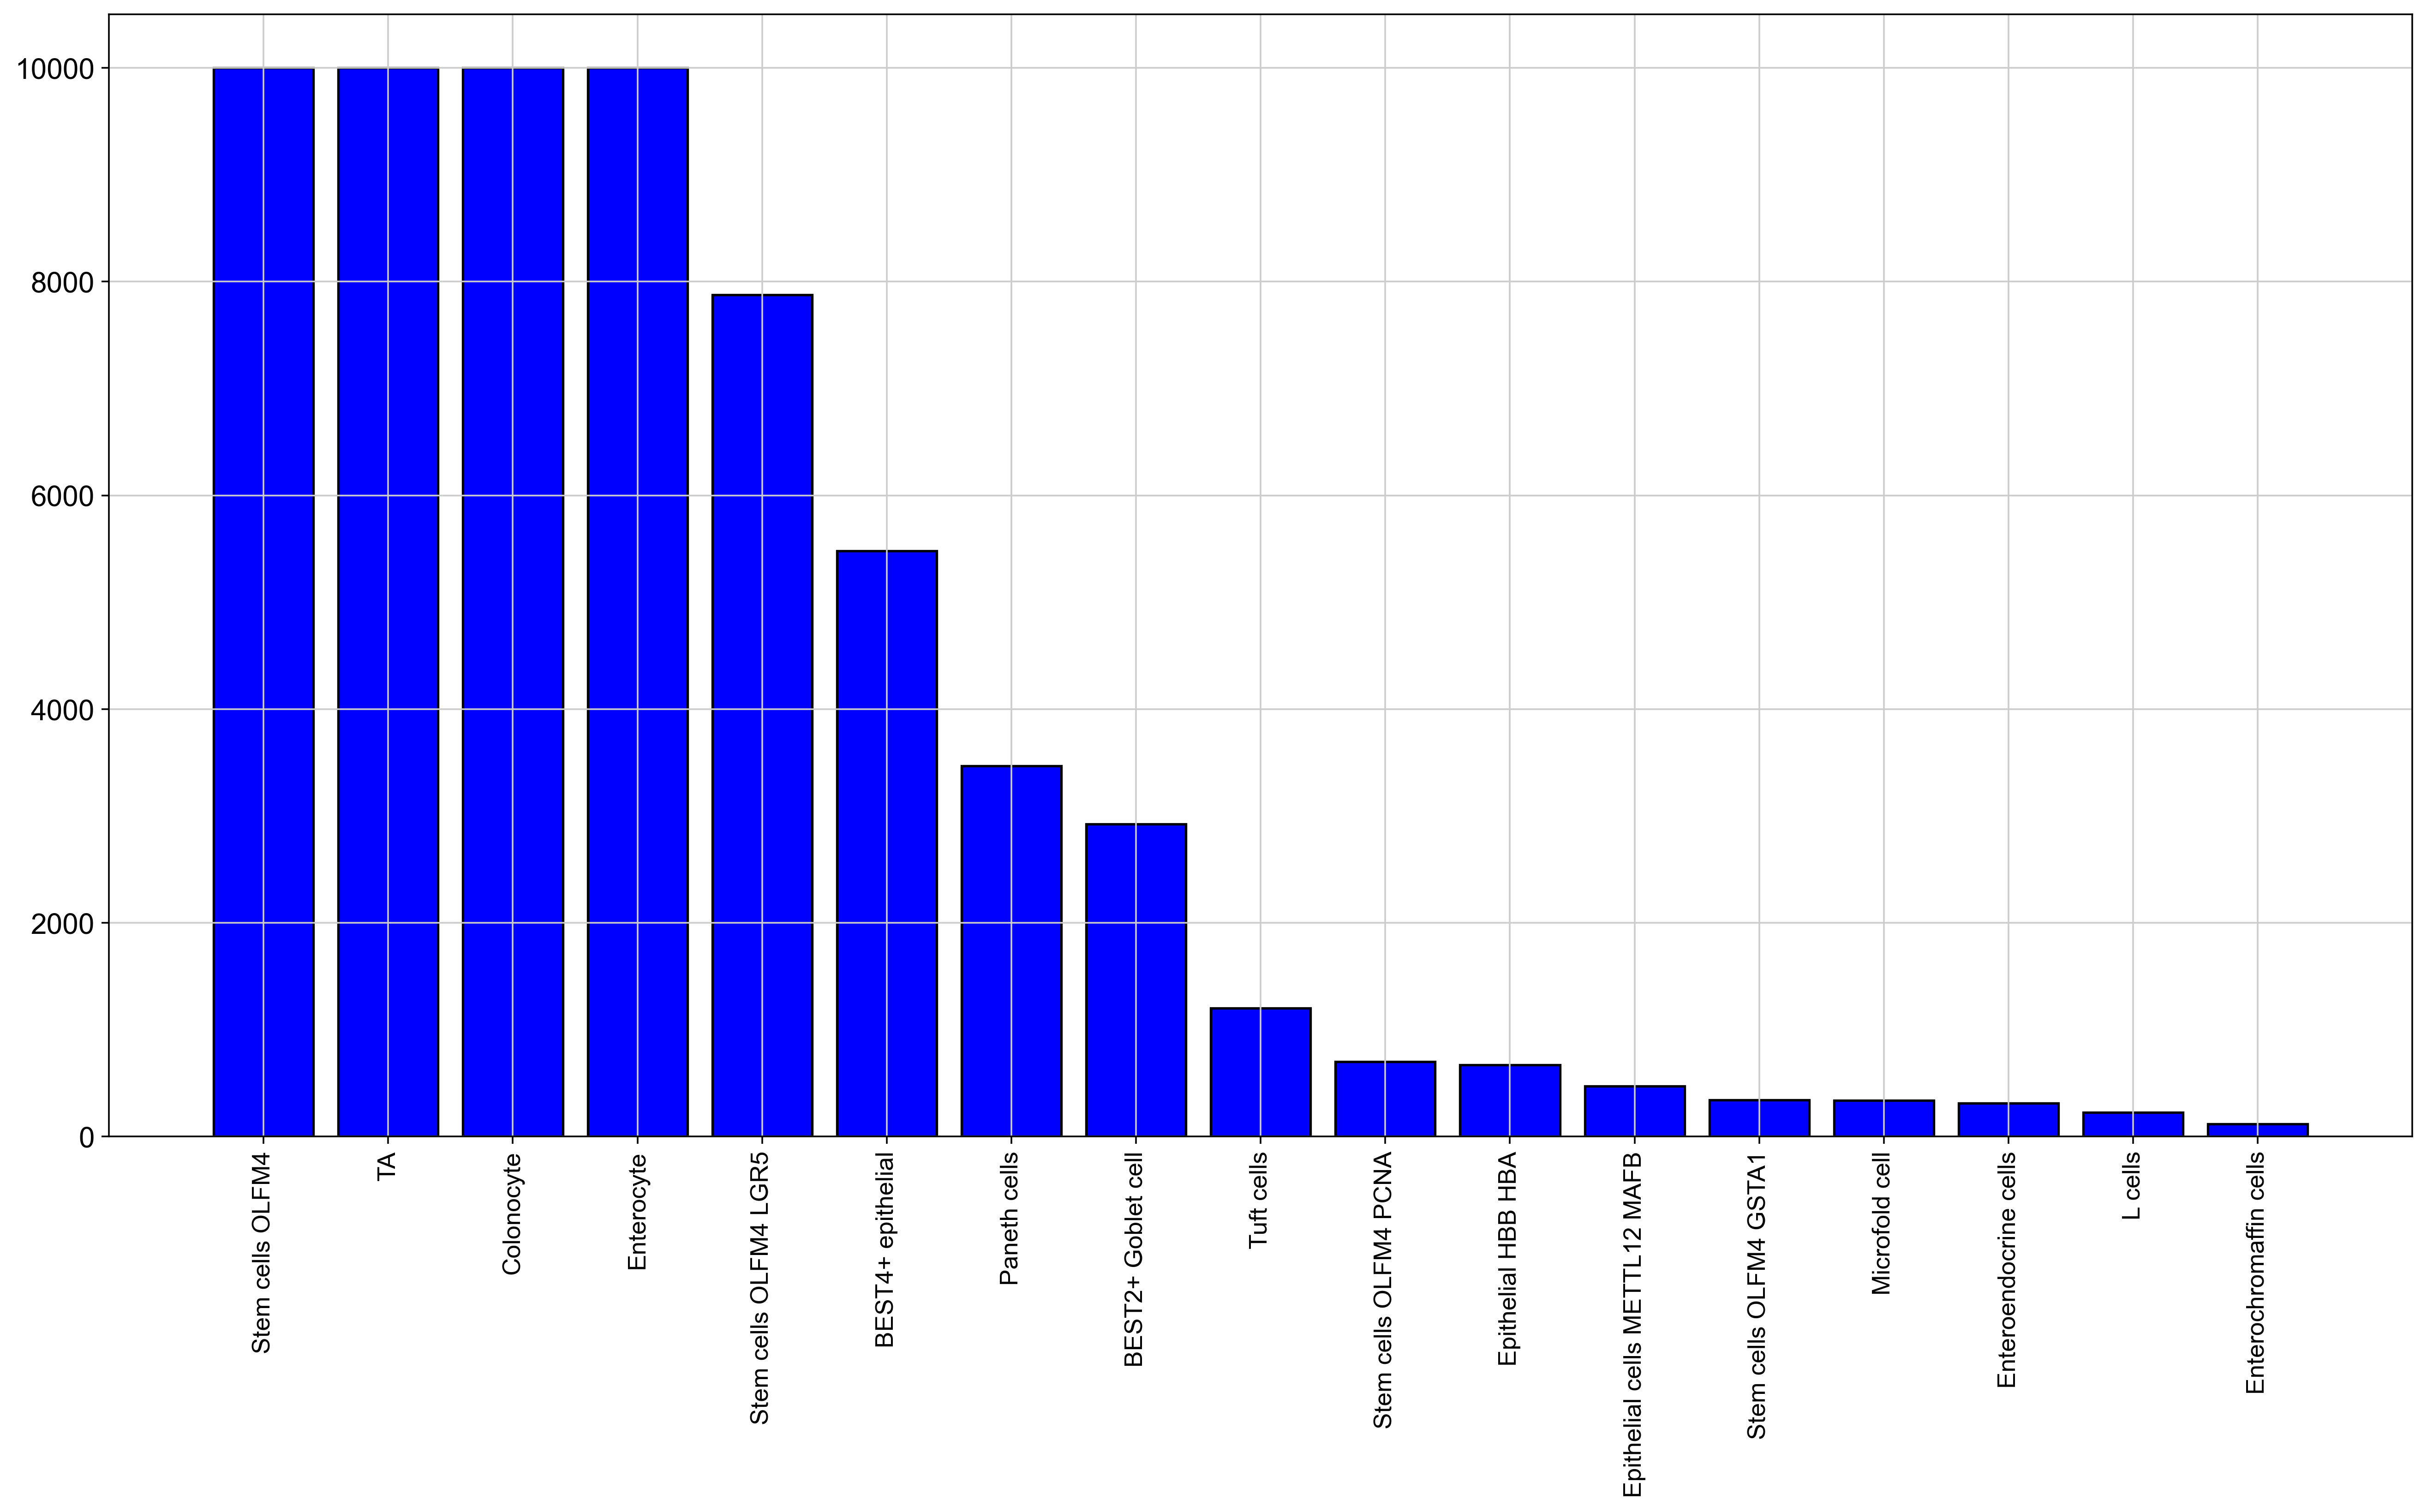

In [28]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(Healthy_adata.obs["Unified Cell States"].value_counts().index, Healthy_adata.obs["Unified Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [29]:
#Save the anndata_subset object - local machine path
Healthy_adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/Epithelial_cells/Geosketch_subset/Epithelial_cells_Geosketch_subset_all_genes.h5ad')

### Normalize Counts and Extract Highly Variable Genes

In [35]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/all_cells/Colon_cancer_atlas_anndata.h5ad'
Cancer_adata = sc.read_h5ad(input)

In [36]:
sc.pp.log1p(Cancer_adata)
sc.pp.log1p(Healthy_adata)

In [32]:
Healthy_adata.layers['raw_counts'] = Healthy_adata.X.copy()

### HVGs selection
# Calculate HVGs for cancer dataset
sc.pp.highly_variable_genes(
    Healthy_adata,
    flavor = "seurat_v3",
    n_top_genes = 5000,
    layer = "raw_counts",
    batch_key = "Library_Preparation_Protocol",
    subset = True,
    span = 1
)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/Users/anna.maguza/miniconda3/envs/geosketch_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [37]:
Cancer_adata.layers['raw_counts'] = Cancer_adata.X.copy()

In [38]:
# Extract same HVGs in the cancer dataset as in the healthy dataset

#Make indexes as string
Cancer_adata.var.index = Cancer_adata.var.index.astype(str)

# Ensure indexes are unique
Cancer_adata.var_names_make_unique()

# Identify common genes
common_genes = list(set(Healthy_adata.var_names) & set(Cancer_adata.var_names))

# Filter genes
Healthy_adata = Healthy_adata[:, common_genes]
Cancer_adata = Cancer_adata[:, common_genes]

#Ensure the same order of the genes
Cancer_adata = Cancer_adata[:, Healthy_adata.var_names]

/Users/anna.maguza/miniconda3/envs/geosketch_env/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-5', 'SNORD116-6']
  warnings.warn(


In [39]:
# Save anndata objects
Healthy_adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/Epithelial_cells/Geosketch_subset/Healthy_epithelial_cells_Geosketch_subset_5000_HVGs.h5ad')
Cancer_adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/input_files/Epithelial_cells/Geosketch_subset/Cancer_epithelial_cells_5000_HVGs.h5ad')